## 1. Lectura de les dades

En aquest apartat carreguem els conjunts de dades `diamonds-train.csv` i `diamonds-test.csv`, que contenen informació sobre les característiques dels diamants. 

Hi ha un conjunt d'entrenament que es fa servir per entrenar i ajustar els models, mentre que el conjunt de test es fa servir exclusivament per avaluar la seva capacitat predictiva.


In [1]:
import pandas as pd
import os
os.chdir("/home/jovyan/work")
print (os.getcwd())
#aixo ho hem de treure

/home/jovyan/work


In [3]:
import pandas as pd

# Carreguem els conjunts de dades
train_df = pd.read_csv('diamonds-train.csv')
test_df = pd.read_csv('diamonds-test.csv')

# Mostrem les dimensions i les primeres files de cada conjunt
print(f"Conjunt d'entrenament: {train_df.shape[0]} files, {train_df.shape[1]} columnes")
display(train_df.head())
print(f"Conjunt de test: {test_df.shape[0]} files, {test_df.shape[1]} columnes")
display(test_df.head())

Conjunt d'entrenament: 44000 files, 11 columnes


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


Conjunt de test: 9940 files, 11 columnes


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715


#### Resultats de la lectura de dades

Després de carregar els datasets, hem obtingut els següents conjunts:

- **Conjunt d'entrenament (`train_df`)**: 44.000 files i 11 columnes.
- **Conjunt de test (`test_df`)**: 9.940 files i 11 columnes.

Tal i com se'ns proporcionava a l'enunciat.

Cada fila representa un diamant amb les seves característiques físiques i el seu preu. Les columnes són:

- `id`: identificador únic del diamant.
- `carat`: pes del diamant.
- `cut`: qualitat del tall, de pitjor a millor: *Fair*, *Good*, *Very Good*, *Premium*, *Ideal*.
- `color`: grau de color, de pitjor a millor: *J* a *D*.
- `clarity`: claredat, de pitjor a millor: *I1*, *SI2*, *SI1*, *VS2*, *VS1*, *VVS2*, *VVS1*, *IF*.
- `depth`: profunditat percentual (calculada com 2 * z / (x + y)).
- `table`: amplada de la taula del diamant.
- `x`, `y`, `z`: dimensions físiques del diamant en mil·límetres.
- `price`: preu en dòlars.

Aquestes dades seran les que utilitzarem al llarg de la pràctica per fer les prediccions, així com per explorar la relació entre les seves característiques.

---


## 2. Pre-processament de les dades
### a. Identificar els patrons amb dades "no físiques"
En aquest apartat volem detectar els valors que no són físicament possibles o que tenen errors evidents. A partir de la descripció dels atributs, les dades han de seguir les següents condicions:

- Els atributs `x`, `y` i `z` representen les dimensions del diamant en mil·límetres, i per tant **no poden ser menors o iguals a zero**.
- El valor de `depth` representa el percentatge de profunditat del diamant i ha d'estar dins del rang **43 a 79**.
- L'atribut `table` també ha d'estar dins del rang **43 a 95**.
- Els `preus` dels diamants es situen dins del rang de **325 i 18823**
- El `pes` dels diamants és d'entre **0,2 i 5,01**

Tots els registres que no compleixen aquestes condicions els considerem no físics. 


In [4]:
# Busquem valors físicament invàlids
non_physical_train = train_df[
    (train_df['price'] < 326) | (train_df['price'] > 18823) |
    (train_df['carat'] < 0.2) | (train_df['carat'] > 5.01) |
    (train_df['x'] <= 0) | (train_df['x'] > 10.74) |
    (train_df['y'] <= 0) | (train_df['y'] > 58.9) |
    (train_df['z'] <= 0) | (train_df['z'] > 31.8) |
    (train_df['depth'] < 43) | (train_df['depth'] > 79) |
    (train_df['table'] < 43) | (train_df['table'] > 95)
]

non_physical_test = test_df[
    (test_df['price'] < 326) | (test_df['price'] > 18823) |
    (test_df['carat'] < 0.2) | (test_df['carat'] > 5.01) |
    (test_df['x'] <= 0) | (test_df['x'] > 10.74) |
    (test_df['y'] <= 0) | (test_df['y'] > 58.9) |
    (test_df['z'] <= 0) | (test_df['z'] > 31.8) |
    (test_df['depth'] < 43) | (test_df['depth'] > 79) |
    (test_df['table'] < 43) | (test_df['table'] > 95)
]

print(f"Número de registres amb valors no físics al conjunt d'entrenament: {len(non_physical_train)}")
display(non_physical_train)

print(f"Número de registres amb valors no físics al conjunt de test: {len(non_physical_test)}")
display(non_physical_test)



Número de registres amb valors no físics al conjunt d'entrenament: 16


,id,carat,cut,color,clarity,depth,table,x,y,z,price
1577,1578,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
6555,6556,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383
9582,9583,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,18788
9858,9859,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0,12800
11595,11596,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
11837,11838,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
13415,13416,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
14807,14808,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
15634,15635,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
16397,16398,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167


Número de registres amb valors no físics al conjunt de test: 4


,id,carat,cut,color,clarity,depth,table,x,y,z,price
4205,48206,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
8430,52431,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,15686
9202,53203,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
9931,53932,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


#### Resultats:
Hem identificat **16 registres** del conjunt d'entrenament i **4 registres** del conjunt de test que contenen valors físicament impossibles o invàlids segons els rangs establerts a l'enunciat. Aquests valors poden indicar errors de mesura o problemes de registre.


##### Tipus de problemes detectats:
1. **Dimensions nul·les (x, y, z = 0)**:
   - En tots els registres tenen el valor `z=0`. Això implica que el diamant no té profunditat, cosa físicament impossible. 
   - En 6 registres de les dades d'entrenament (`id=1578`, `9859`, `11596`, `11838`, `15635`, `30338`), tant `x` com `y` també són 0. Això implica que el diamant no té cap mida mesurable, cosa inviable físicament.
   - En el registre de les dades de test ìd
 
2. **Preus fora de rang**
   - Els preus d'aquests registres no estan fora de rang, però sí que poden ser engayosos, tenint en compte que les dimensions són nul·les. Alguns patrons amb dades "no físiques", tenen preus molt alts, com:
       - `id=9583` = 18788
       - `id=30338` = 18034
       - `id=33601` = 18207  
    - Aquests valors poden distorsionar el model en estimacions de preu si es mantenen.

És important que eliminem aquests registres abans d’entrenar qualsevol model, ja que podrien introduir soroll o fer que el model aprengui patrons erronis.


##### b. Identificar outliers a partir de la distribució de cada atribut

Aquí busquem els valors atípics que, tot i ser físicament possibles, es troben molt allunyats del comportament habitual de la mostra. Per detectar-los, utilitzem la tècnics de l'IRQ (*Interquartile Range*):

- Es calcula el primer quartil (Q1) i el tercer quartil (Q3) per cada atribut numèric.
- Es defineix l'interval acceptable com a [Q1 - 1.5·IQR, Q3 + 1.5·IQR].
- Els valors fora d'aquest interval es consideren **outliers**.

Això permet detectar registres que podrien afectar negativament el rendiment dels models si no es tracten adequadament.


## 2.b. Identificació d’outliers a partir de la distribució de cada atribut

Per detectar valors extrems (*outliers*) en el conjunt d'entrenament, s’ha aplicat la tècnica de l’**IQR (Interquartile Range)** sobre els següents atributs numèrics:

- `price`: preu del diamant
- `carat`: pes del diamant
- `x`, `y`, `z`: dimensions físiques
- `depth`: percentatge de profunditat
- `table`: amplada del cim relativa

### Mètode aplicat

Per cada atribut:

1. S’han calculat els **quartils Q1 i Q3**.
2. S’ha obtingut el rang interquartílic: `IQR = Q3 - Q1`.
3. S’han determinat els límits:
   - Límits inferiors: `Q1 - 1.5 * IQR`
   - Límits superiors: `Q3 + 1.5 * IQR`
4. S’han considerat outliers els valors fora d’aquests límits.

### Resultats

Per a cada atribut, s’ha informat del **nombre de valors outliers** detectats. També s’ha comptabilitzat el **nombre total de registres únics** amb almenys un valor extrem.

Aquesta anàlisi permet:

- **Detectar errors potencials** o valors inusuals.
- **Avaluar la necessitat de transformacions o filtratges** abans d’entrenar el model.
- Millorar la **robustesa estadística** eliminant dades que podrien esbiaixar els resultats.

> ⚠️ *Nota:* Un mateix registre pot aparèixer com a outlier en més d’un atribut. Per això, s’han eliminat duplicats en el recompte final.

### Passos següents

Abans de decidir si eliminem o transformem els outliers, convé:
- Analitzar la seva naturalesa (errors o casos reals però rars).
- Estudiar l’impacte en el model predictiu.






In [5]:
import numpy as np


# Atributs numèrics per analitzar
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25) 
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"{col}: {len(col_outliers)} outliers")
    
    # Afegim aquests outliers al DataFrame
    outliers = pd.concat([outliers, col_outliers])

# Eliminar duplicats per si un registre és outlier en més d'una variable
outliers = outliers.drop_duplicates()
print(f"\nNombre total de files amb almenys un outlier: {len(outliers)}")
display(outliers)


price: 2907 outliers
carat: 1536 outliers
x: 27 outliers
y: 28 outliers
z: 41 outliers
depth: 2063 outliers
table: 490 outliers

Nombre total de files amb almenys un outlier: 5247


,id,carat,cut,color,clarity,depth,table,x,y,z,price
9,10,1.80,Ideal,F,SI1,61.4,54.0,7.86,7.82,4.81,16340
78,79,2.36,Ideal,H,SI2,62.2,55.0,8.51,8.56,5.30,17569
83,84,2.17,Premium,J,SI2,62.3,60.0,8.33,8.20,5.15,13395
111,112,1.72,Ideal,H,VS2,61.9,56.0,7.70,7.75,4.78,15197
115,116,1.66,Very Good,G,VS2,63.2,56.0,7.61,7.49,4.77,15229
...,...,...,...,...,...,...,...,...,...,...,...
43567,43568,1.14,Good,E,SI1,60.9,64.0,6.78,6.68,4.09,5899
43693,43694,0.96,Fair,F,I1,62.9,66.0,6.29,6.07,3.91,1917
43750,43751,1.01,Good,E,SI1,59.3,64.0,6.47,6.49,3.84,4399
43927,43928,0.71,Fair,I,VS2,61.6,67.0,5.76,5.61,3.50,1840


##### c. Identificar outliers a partir de scatter plots atribut/preu.
Hem creat diagrames de dispersió entre la variable `price` i cada atribut numèric del conjunt de dades. Aquesta anàlisi visual permet detectar valors que, tot i estar dins dels rangs físics i estadístics, mostren un comportament inusual respecte al preu. Per exemple, un diamant amb pes molt alt (`carat`) però preu molt baix, o dimensions petites amb preus desproporcionadament elevats, poden indicar errors de mesura o anomalies.

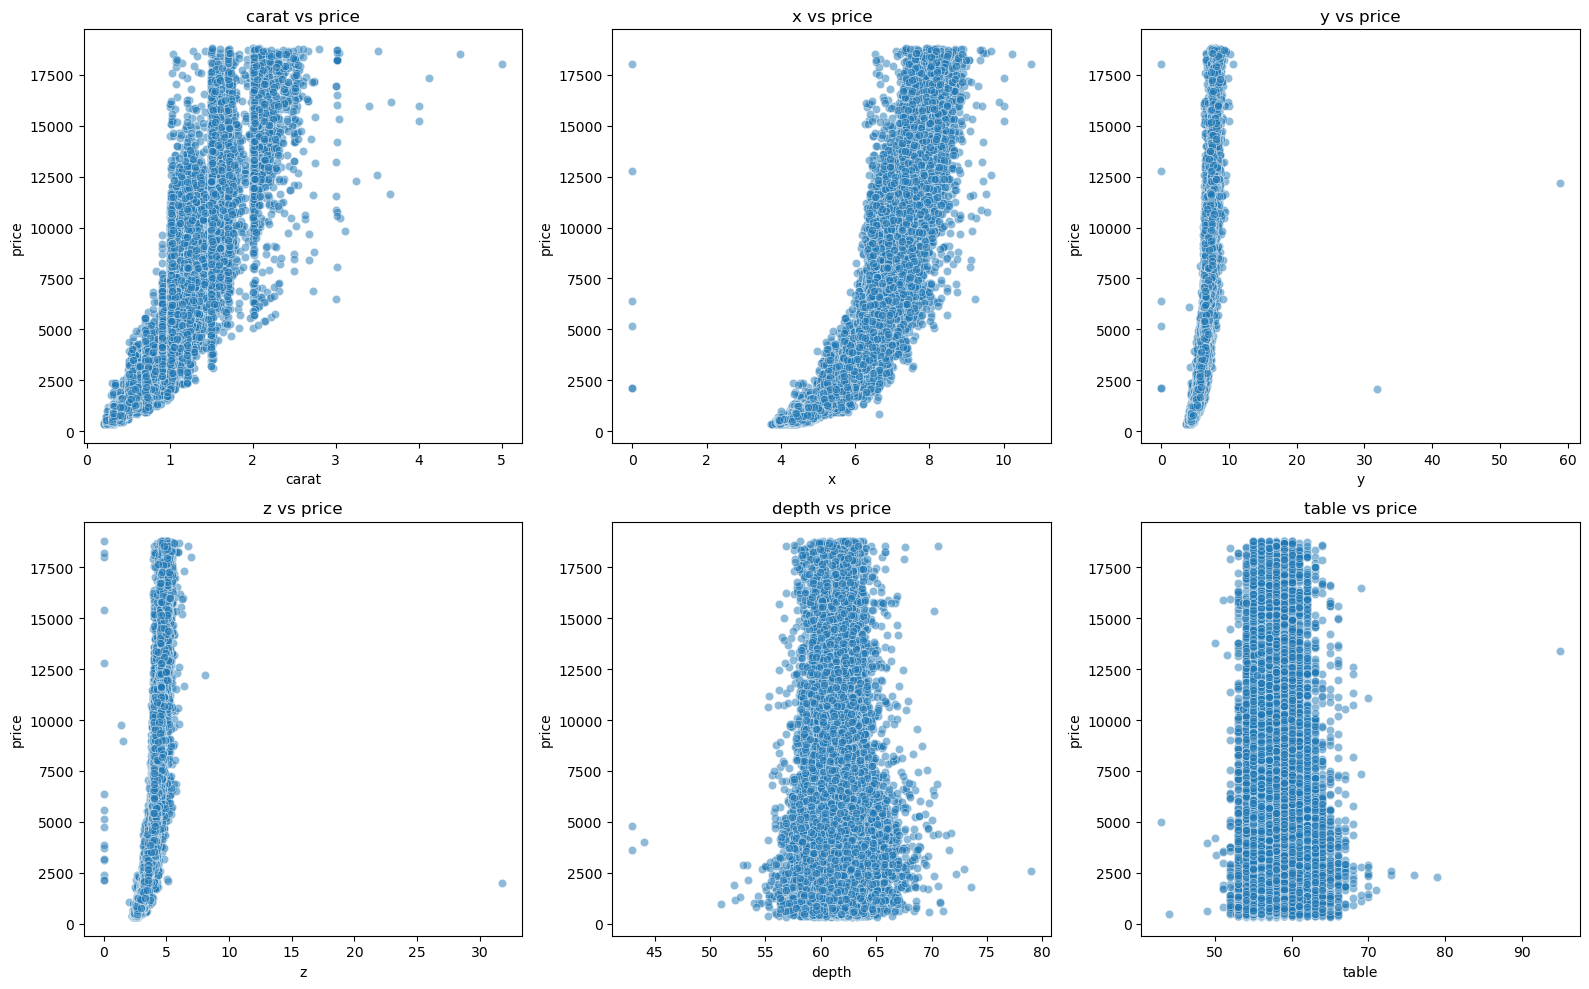

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atributs numèrics
numeric_cols = ['carat', 'x', 'y', 'z', 'depth', 'table']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=train_df, x=col, y='price', alpha=0.5)
    plt.title(f'{col} vs price')

plt.tight_layout()
plt.show()


#### 1. `carat` vs `price`

* **Tendència clara positiva**: a mesura que augmenta el pes (`carat`), el preu augmenta, com és d’esperar.
* **Outliers visibles**:

  * Alguns diamants amb pes molt alt (> 3) tenen preus més baixos del que seria esperable.
  * També s’observen alguns punts amb `carat` < 0.5 i preus molt alts, que podrien ser errors o diamants amb característiques especials no reflectides en altres atributs.

**Conclusió**: revisar diamants amb `carat > 3` i `price < 10000`, i amb `carat < 0.5` però `price > 15000`.
 
---

#### 2. `x` vs `price`

* Relació positiva coherent (x més gran implica més preu), però més dispersa que `carat`.
* **Outliers**:

  * Valors molt baixos de `x` (menys de 2 o 3 mm) amb preus alts, sospitosos.
  * Alguns punts amb `x > 10` però preus relativament baixos també poden ser fora de tendència.

**Conclusió**: revisar valors extrems de `x`, especialment < 3 o > 10.

 ---

#### 3. `y` vs `price`

* S’observa una **anomalia clara**: un punt amb `y` > 50 mm i preu mitjà. Aquest valor és molt fora del rang habitual (la majoria entre 4 i 12).
* També hi ha alguns punts amb `y ≈ 0`, que podrien ser errors de mesura.

**Conclusió**:

* El punt amb `y ≈ 58.9` pot ser un **error clar**.
* Valors molt petits (`y < 1`) també són sospitosos.

---

####  4. `z` vs `price`

* Relació menys clara, però amb comportament concentrat.
* **Outliers evidents**:

  * Un punt amb `z > 30`, que és molt fora del normal.
  * Alguns amb `z ≈ 0`, que són errors físics o d’entrada.

**Conclusió**: revisar tots els valors amb `z < 1` o `z > 15`.

---

#### 5. `depth` vs `price`

* Distribució bastant horitzontal i compacta entre valors de `depth` entre 55 i 65.
* **Outliers**:

  * Valors extrems de `depth` (per sota de 50 o per sobre de 75) que no tenen cap tendència clara amb el preu i podrien ser errors o formats no habituals.

**Conclusió**: revisar `depth < 50` o `depth > 75`.

---

#### 6. `table` vs `price`

* Molta dispersió, sense tendència forta amb el preu.
* **Outliers clars**:

  * Un punt amb `table` > 90 i preu mitjà.
  * Alguns amb `table` < 45.

**Conclusió**: revisar valors amb `table < 45` o `table > 90`.

---

#### Resum general

Punts sospitosos o outliers visuals a revisar:

* `carat` < 0.5 amb preus molt alts o `carat` > 3 amb preus molt baixos.
* `x`, `y`, `z` ≈ 0 o exageradament alts (especialment `y > 50`, `z > 30`).
* `depth` i `table` fora dels seus rangs normals, especialment si no tenen correlació amb el preu.



##### d. Fer una taula amb els identificadors dels outliers, els seus atributs, i les raons per la qual cadascú es considera outlier.
Explicació

In [7]:
# Crear una llista per guardar informació dels outliers
outliers_list = []

# Funció per afegir l'entrada a la llista amb la seva raó
def add_outlier(row, reason):
    outliers_list.append({
        'id': row['id'],
        'carat': row['carat'],
        'x': row['x'],
        'y': row['y'],
        'z': row['z'],
        'depth': row['depth'],
        'table': row['table'],
        'price': row['price'],
        'reason': reason
    })

# ---------- Basat en scatter plots ---------- #

# carat outliers visuals
carat_outliers = train_df[(train_df['carat'] < 0.5) & (train_df['price'] > 15000)]
for _, row in carat_outliers.iterrows():
    add_outlier(row, 'carat molt petit amb preu molt alt')

carat_outliers2 = train_df[(train_df['carat'] > 3) & (train_df['price'] < 10000)]
for _, row in carat_outliers2.iterrows():
    add_outlier(row, 'carat molt gran amb preu baix')

# x, y, z ≈ 0
for axis in ['x', 'y', 'z']:
    axis_outliers = train_df[train_df[axis] < 1]
    for _, row in axis_outliers.iterrows():
        add_outlier(row, f'{axis} gairebé 0')

# y > 50
y_outliers = train_df[train_df['y'] > 50]
for _, row in y_outliers.iterrows():
    add_outlier(row, 'y molt alt (> 50)')

# z > 30
z_outliers = train_df[train_df['z'] > 30]
for _, row in z_outliers.iterrows():
    add_outlier(row, 'z molt alt (> 30)')

# depth < 50 o > 75
depth_outliers = train_df[(train_df['depth'] < 50) | (train_df['depth'] > 75)]
for _, row in depth_outliers.iterrows():
    add_outlier(row, 'depth fora de rang raonable')

# table < 45 o > 90
table_outliers = train_df[(train_df['table'] < 45) | (train_df['table'] > 90)]
for _, row in table_outliers.iterrows():
    add_outlier(row, 'table fora de rang raonable')

# ---------- Convertim a DataFrame i eliminem duplicats ---------- #
outlier_df = pd.DataFrame(outliers_list)
outlier_df = outlier_df.drop_duplicates(subset='id')  # cada diamant només una vegada

# Mostrem els resultats
print(f"Nombre total d'outliers visuals identificats: {len(outlier_df)}")
display(outlier_df)


Nombre total d'outliers visuals identificats: 27


,id,carat,x,y,z,depth,table,price,reason
0,15646,3.01,9.10,8.97,5.67,62.7,58.0,8040,carat molt gran amb preu baix
1,40623,3.11,9.15,9.02,5.98,65.9,57.0,9823,carat molt gran amb preu baix
2,1578,1.00,0.00,0.00,0.00,63.3,53.0,5139,x gairebé 0
3,9859,1.56,0.00,0.00,0.00,62.2,54.0,12800,x gairebé 0
4,11596,1.14,0.00,0.00,0.00,57.5,67.0,6381,x gairebé 0
5,11838,0.71,0.00,0.00,0.00,64.1,60.0,2130,x gairebé 0
6,15635,0.71,0.00,0.00,0.00,64.1,60.0,2130,x gairebé 0
7,30338,2.25,0.00,0.00,0.00,62.8,59.0,18034,x gairebé 0
15,6556,1.12,6.71,6.67,0.00,60.4,59.0,2383,z gairebé 0
16,9583,2.80,8.90,8.85,0.00,63.8,58.0,18788,z gairebé 0


S’han identificat **27 outliers visuals** segons la relació entre atributs numèrics i el preu.

#### Anàlisi per tipus d'outlier:

**1. Diamants amb carat molt gran i preu baix**
- IDs: `15646`, `40623`
- Aquests diamants tenen més de 3 carats però amb preus inferiors a 10000 $, això no es gaire habitual, ja que com més pes tenen els diamants, més cars són.
- Això ens pot indicar errors en els preus o qualitat molt baixa no reflectida en altres atributs.

**2. Dimensions gairebé 0**
- `x gairebé 0`: IDs com `1578`, `9859`, `11596`, `11838`, `15635`, `30338`
- `z gairebé 0`: IDs com `6556`, `9583`, `13416`, `14808`, `16398`, `24538`, etc.
- Aquestes dimensions que són tan petites són físicament impossibles en els diamants reals, probablement són errors de mesura o d'entrada de dades.

#### 3. **Valors extremadament alts**

* `y > 50`: ID `19146` amb `y = 58.90`
* `z > 30`: ID `10263` amb `z = 31.80`
* Són valors desproporcionats en relació amb la resta de dimensions (`x`, `carat`, etc.), cosa que els fa clarament outliers. Podrien provenir de **unitats incorrectes o valors mal escrits**.

#### 4. **`depth` fora del rang raonable (menys de 50 o més de 75)**

* Exemples: `1092`, `7480`, `22110`, `27043`
* Valors típics de `depth` en diamants estan entre **58 i 64** (aprox). Aquests estan **fora de proporció**, cosa que indica problemes estructurals que afecten la qualitat o errors.

#### 5. **`table` fora de rang raonable (menys de 45 o més de 90)**

* Exemples: `4497`, `18797`, `20676`
* Igual que amb el `depth`, un valor molt baix o molt alt del `table` pot fer que el diamant sigui visualment pobre o que sigui un error de registre.

---

### 📌 Conclusió general

* Hi ha **diversos tipus d’errors potencials**: valors físicament impossibles (x ≈ 0), inconsistències greus (carat alt amb preu baix), i atributs fora de rang conegut (`depth`, `table`).
* La majoria probablement **no són diamants vàlids per a entrenar un model** (errors de mesura, entrada de dades o registres no representatius).
* Recomanació: **eliminar aquests outliers** abans de fer anàlisi estadística o entrenar models, especialment si es busca predir el preu.

Vols que t’ajudi a fer un codi per eliminar aquests outliers del teu `train_df` original?


### e. Decidir què fer amb els outliers i aplicar-ho als conjunts de dades

Per garantir que els models s'entrenin amb dades representatives i coherents, hem eliminat els registres considerats outliers segons:

- Valors físicament invàlids.
- Valors extrems detectats via distribució (IQR).
- Anomalies visuals evidents en scatter plots.

Al conjunt de test només s'han eliminat valors físicament invàlids, ja que no podem utilitzar informació d’aquest conjunt per a l’anàlisi prèvia.

In [ ]:
# 1. Unim tots els identificadors d'outliers
ids_outliers = set(non_physical_train['id']) \
    .union(outliers_train['id']) \
    .union(outlier_df['id'])

print(f"Total d'outliers únics a eliminar del conjunt d'entrenament: {len(ids_outliers)}")

# 2. Eliminem els outliers del conjunt d'entrenament
train_df_clean = train_df[~train_df['id'].isin(ids_outliers)].copy()
print(f"Tamany original del train_df: {len(train_df)}")
print(f"Tamany net del train_df_clean: {len(train_df_clean)}")


# 1. Unir els identificadors d'outliers visuals i no físics del conjunt de test
ids_outliers_test = set(non_physical_test['id']) \
    .union(outliers_test['id'])

print(f"Total d'outliers ú